<a href="https://colab.research.google.com/github/andrescastro-itm/IAW102_notebooks/blob/main/PruebaPlotlySlider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go

np.random.seed(seed=0)

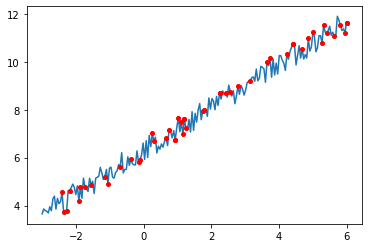

In [2]:
D = lambda x: 0.9*x+5.8
t = np.linspace(-3,6,200)
TT = D(t)+np.random.rand(200)
fig = plt.figure()
plt.plot(t,TT)


per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
X = np.expand_dims(X,axis=1)
y = np.expand_dims(y,axis=1)


o = np.ones(nd)
X = X.reshape(nd)
X1 = np.stack((o,X),axis = 1)
G = np.stack((np.ones(200),t),axis = 1)

plt.plot(X,y,'or',markersize=4)
plt.show()

In [3]:
xm = np.min(X) - 1.5
xM = np.max(X) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5

alfa = 0.15
w = np.random.random_sample((X1.shape[1],1))
w_n = 3*w
i=0

ws = []
traces1_list =[]
traces2_list =[]

it_hop = 2

while np.abs(np.linalg.norm(w_n-w)) > 1e-3:
    w_n = w.copy()
    for j in range(2):
        w[j] = w[j] - 1/nd*alfa*np.matmul((np.matmul(X1,w)-y).T,X1[:,j])
    if i%it_hop == 0:
        ws.append(w.copy())
        traces1_list.append(go.Scatter(x=t.squeeze(),
                y=np.matmul(G,w).squeeze(),
                mode="lines",
                marker=dict(color="blue", size=10),
                visible=False,
                name='Recta')
        )
        traces2_list.append(go.Scatter(x=X.squeeze(),
                y=y.squeeze(),
                mode="markers",
                marker=dict(color="red", size=10),
                visible=False,
                name='Datos')
        )
    i += 1

fig = go.Figure()
traces1_list[0]['visible'] = True
traces2_list[0]['visible'] = True
fig = go.Figure(traces1_list + traces2_list)

steps = []
for i in range(len(traces1_list)):
    # Define the steps
    step = dict(
        method = 'update',
        label =  str(i*it_hop),
        args = [{'visible': [False] * len(fig.data)},
                {"title" : "Regresión Lineal"}]
    )
    
    # Update the visible traces for each step
    step['args'][0]['visible'][i] = True
    step['args'][0]['visible'][i+len(traces1_list)] = True
    # step['args'][0]['visible'][i+2*num_r0] = True
    
    steps.append(step)

sliders = [dict(steps = steps,
                active = 0,
                currentvalue={'visible' : True,"prefix": "Iteración: ",'xanchor':'center'},
                pad = {"t" : 50},)]

### Step 8 - Final Figure generation ###
fig.update_layout(sliders=sliders,
                  title = "Regresión Lineal",
                  template='plotly_white',
                  xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                  yaxis=dict(range=[ym, yM], autorange=False, zeroline=False))
fig.update_yaxes(title='y')
fig.update_xaxes(title='Característica 1')

# Figure preview
fig.show()
#https://walkintheforest.com/Using+Plotly+Slider+Widgets+with+Multiple+Traces

In [ ]:
len(step['args'][0]['visible'])

120

In [ ]:
len(traces1_list)

60